<a href="https://colab.research.google.com/github/KauaHenSilva/python_facial_detection/blob/main/face_detection_using_IBPH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [26]:

import requests
import os
import zipfile
import shutil


def download_large_file_from_google_drive(file_id, destination):
    base_url = "https://drive.google.com/uc?export=download"

    with requests.Session() as session:
        response = session.get(base_url, params={'id': file_id}, stream=True)
        for key, value in response.cookies.items():
            if key.startswith('download_warning'):
                confirm_token = value
                break
        else:
            confirm_token = None

        if confirm_token:
            params = {'id': file_id, 'confirm': confirm_token}
            response = session.get(base_url, params=params, stream=True)

        # Escrever o conteúdo do arquivo no destino
        with open(destination, 'wb') as f:
            for chunk in response.iter_content(32768):
                f.write(chunk)

download_large_file_from_google_drive('1zW-QRuGmiEHUG6xxMHXMhK8b3ynVsf3I', 'jones_gabriel.zip')

if not os.path.exists('jones_gabriel'):

    with zipfile.ZipFile('jones_gabriel.zip', 'r') as zip_ref:
        zip_ref.extractall('jones_gabriel_temp')

    shutil.move('jones_gabriel_temp/jones_gabriel', 'jones_gabriel')
    shutil.rmtree('jones_gabriel_temp')
    os.remove('jones_gabriel.zip')

## Iniciando Aplicação

In [27]:
from PIL import Image
import cv2
import numpy as np
import seaborn as sbn
from sklearn.metrics import accuracy_score, confusion_matrix

Iniciando variaveis para database

In [16]:
files_path = [os.path.join('./jones_gabriel/', x) for x in os.listdir('jones_gabriel/')]
faces = []
ids = []

Iniciando database

In [21]:
for file_path in files_path:
    image = Image.open(file_path).convert('L')
    image_np = np.array(image)

    faces.append(image_np)
    ids.append(int(file_path.split('/')[-1].split('.')[1]))

Treinando Modelo

In [22]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, np.array(ids))
lbph_classifier.write('lbph_model.yml')

Lendo o Modelo

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.read('lbph_model.yml')

Testando o modelo

Accuracy: 100.0%


<Axes: >

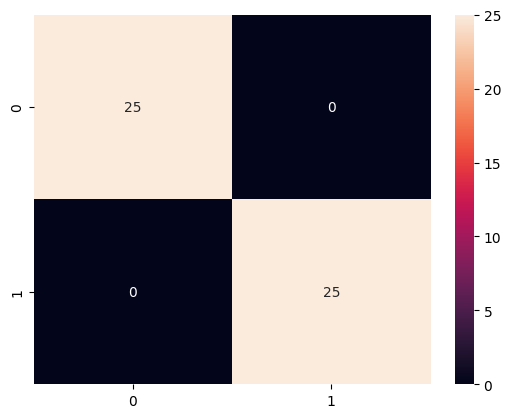

In [29]:
test_file_path = [os.path.join('./jones_gabriel/', x) for x in os.listdir('jones_gabriel/')]
prev = []
expected = []

for file_path in test_file_path:
    image = Image.open(file_path).convert('L')
    image_np = np.array(image)

    prediction = lbph_classifier.predict(image_np)

    expected.append(int(file_path.split('/')[-1].split('.')[1]))
    prev.append(prediction[0])

accuracy = (np.mean(prev == expected)) * 100
print(f'Accuracy: {accuracy}%')

sbn.heatmap(confusion_matrix(expected, prev), annot=True)